<a href="https://colab.research.google.com/github/jfestradan/Modelado-y-simulacion/blob/master/DOP853.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método explícito de Runge-Kutta de orden 8 (5,3)

Resuelve el problema del valor inicial para sistemas de ecuaciones diferenciales ordinarias (ODE) en la forma:


$$
\frac{\text{d}y}{\text{d}t}= f(y, t).
$$
Donde t se considera el parametro de tiempo y y la posición en el tiempo t.


Los métodos de estimación de errores de Runge-Kutta a menudo se escriben como "RK M (N)", donde típicamente M especifica el orden del método utilizado para obtener la solución, y N especifica el orden del método utilizado para obtener El error estimado.

El propósito de usar el control de errores es aumentar la precisión de un método. Dado que ya estamos evaluando la función f(t,x) al menos M veces (y generalmente más, depende de la etapa del método), la idea es que tal vez podamos controlar el error arrojando un llamada de función adicional y obtener un aumento en la precisión.


En esencia, DOP es un método de octavo orden de Dormand & Prince que utiliza un estimador de error de quinto orden y un estimador de tercer orden para obtener una salida densa de orden 7. Por lo tanto, DOP853 podría considerarse en última instancia como un método de séptimo orden. 


Esencialmente, la salida densa de un método proporciona una solución que puede usarse como un buen interpolante lineal para la solución en cualquier lugar entre los puntos de salida.


# Salida densa 

El uso de estimaciones de error para controlar el tamaño de pasos tiene una desventaja aparente; los puntos de solución resultantes no pueden predecirse o especificarse al comienzo de un cálculo. Suponiendo que tengo una ecuacion diferencial donde el error me dio muy pequeño, Una forma obvia de lograr esto sería elegir un tamaño de paso más pequeño  en lugar del valor predicho de la fórmula de tamaño de paso. Desde el punto de vista de la tolerancia al error, esto sería casi ciertamente aceptable, pero habría un pérdida de eficiencia debido a los pasos adicionales que son necesarios.
se implica una gran cantidad de puntos intermedios en el intervalo de la ecuacion diferencial.
El costo computacional adicional podría ser considerable. Afortunadamente, esta perspectiva desagradable puede evitarse formando una fórmula de salida interpolante o densa que a veces se denomina extensión continua a la fórmula RK. Por supuesto, un interpolante convencional basado en los valores de dos o se podrían construir más puntos de paso, pero es posible y también preferible, evitar este enfoque de varios pasos derivando directamente una solución Rungekutta continua.


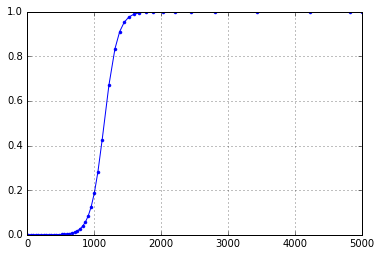

In [0]:
import numpy as np
import matplotlib.style
matplotlib.style.use('classic')
from scipy.integrate import ode
from matplotlib import pyplot as plt
import warnings
%matplotlib inline



def logistic(t, y, r):
       return r * y * (1.0 - y)

r = .01
t0 = 0
y0 = 1e-5
t1 = 5000.0


backend = 'dop853'

solver = ode(logistic).set_integrator(backend, nsteps=1)
solver.set_initial_value(y0, t0).set_f_params(r)
# suppress Fortran-printed warning
solver._integrator.iwork[2] = -1
sol = []
warnings.filterwarnings("ignore", category=UserWarning)
while solver.t < t1:
       solver.integrate(t1, step=True)
       sol.append([solver.t, solver.y])
warnings.resetwarnings()
sol = np.array(sol)

plt.plot(sol[:,0], sol[:,1], 'b.-')
plt.grid()
plt.show()


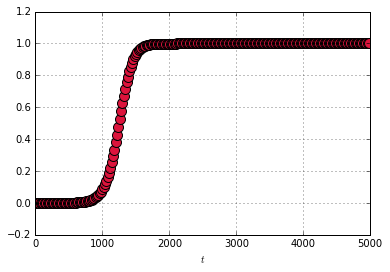

In [0]:
def euler( func, h, tini, tfin, x0, params ):
    ti = tini  
    xi = x0
  
    x = list()
    t = list()
  
    while ( ti < tfin ):
    
      x.append (xi)
      t.append (ti)
  
      xi = xi + h*func(ti,xi,params)
      ti = ti + h
    return t, x    
    
def Ecuacion_log(t, p, a):
    p_dot = 0.01*p*(1-p)
    return p_dot
a=1
h = 20
tini = 0
tfin = 5000
x0 = 1e-5


t1,x1 = euler( Ecuacion_log, h, tini, tfin, x0, a )

plt.figure()

# gráfica de euler:
plt.scatter( t1, x1, c = 'crimson', label = 'Euler', s = 100)
plt.xlim([0, tfin])
#plt.ylim([-3.14, 6.28])
plt.xlabel(r'$t$')
plt.grid()
plt.show()

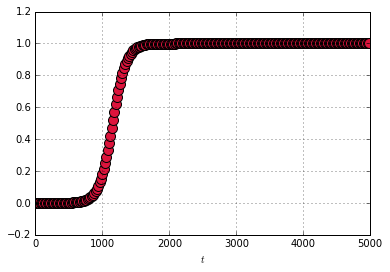

In [0]:

def rk4( func, h, tini, tfin, x0, params ):
    ti = tini  
    xi = x0
  
    x = list()
    t = list()
  
    while ( ti < tfin ):

      x.append (xi)
      t.append (ti)
      k1 = func( ti,xi,params)
      k2 = func( ti + 0.5*h,xi + 0.5*k1*h,params )
      k3 = func( ti + 0.5*h,xi + 0.5*k2*h,params)
      k4 = func( ti + h,xi + k3*h,params) 

      xi = xi + h*(k1 + 2*k2 + 2*k3 + k4)/6
      ti = ti + h
    return t, x

t1,x1 = rk4( Ecuacion_log, h, tini, tfin, x0, a )

plt.figure()

# gráfica de euler:
plt.scatter( t1, x1, c = 'crimson', label = 'rk4', s = 100)
plt.xlim([0, tfin])
#plt.ylim([-3.14, 6.28])
plt.xlabel(r'$t$')
plt.grid()
plt.show()